<a href="https://colab.research.google.com/github/3veryDay/AI_Repo/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필수 라이브러리
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

In [ ]:
# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
# MNIST 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.50MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.69MB/s]


In [ ]:
# 2-layer MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 32)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.act1(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# 모델, 손실함수, 옵티마이저 설정
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# 학습 루프
num_epochs = 10
train_losses = []
start_time = time.time()

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

end_time = time.time()
print(f"\nTotal training time: {end_time - start_time:.2f} seconds")

Epoch 1/10, Loss: 0.5972
Epoch 2/10, Loss: 0.2798
Epoch 3/10, Loss: 0.2327
Epoch 4/10, Loss: 0.2061
Epoch 5/10, Loss: 0.1868
Epoch 6/10, Loss: 0.1729
Epoch 7/10, Loss: 0.1623
Epoch 8/10, Loss: 0.1526
Epoch 9/10, Loss: 0.1447
Epoch 10/10, Loss: 0.1373

Total training time: 137.08 seconds


In [ ]:
# 테스트 정확도 측정
model.eval()
correct = 0
total = 0


with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 95.42%


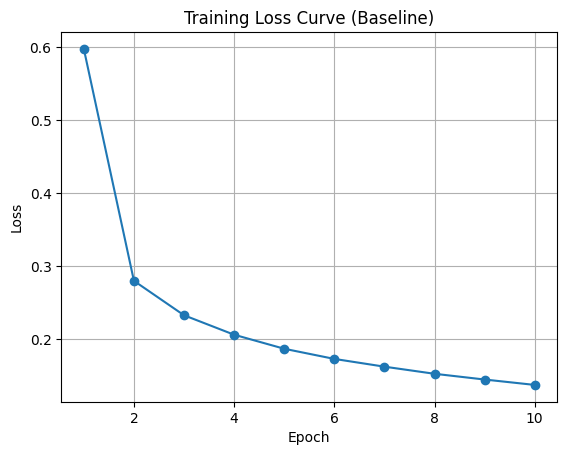

In [ ]:

# 학습 loss 시각화
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.title("Training Loss Curve (Baseline)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()